# Сравнение SVM и KNN на плоских данных

$\textbf{Постановка задачи:}$
сравнить эффективность методов SVM и KNN на плоскиих непересикающихся, пересикающихся и вложенных данных

$\textbf{Используемые инструменты:}$
библиотеки numpy, matplotlib, sklearn

In [30]:
import numpy as np
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from time import time

$\textbf{Используемые метрики:}$
MSE и R^2
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - y_{i-pred})^2}{\sum_{i=1}^{n} (y_i - y_{mean})^2}$$
$$MSE=\frac{1}{n}\sum_{i=1}^n(Y_i-Y_{i-pred})^2$$

In [31]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

$\textbf{Используемые данные:}$

Неперсикающиеся и пересикающиеся:

In [32]:
def nearby_set(depth=10, mindots=60, maxdots=300, factor = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(depth**0.5)):
        for j in range(0, int(depth**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*factor + i, np.random.ranf(count)*factor + j]).T
            y = np.array([int(depth**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, depth - int(depth**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*factor + int(depth**0.5), np.random.ranf(count)*factor + i]).T
        y = np.array([int(depth**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data

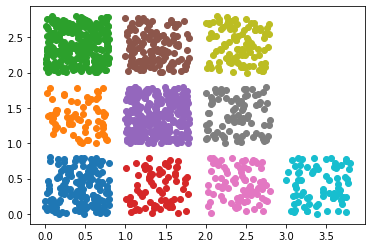

In [33]:
X, y = nearby_set(depth=10, factor = 0.8)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

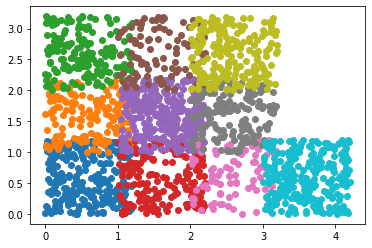

In [34]:
X, y = nearby_set(depth=10, factor = 1.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

Вложенные непересикающиеся и пересикающиеся данные

In [35]:
def included_set(depth=10, mindots=30, maxdots=150, offset=0):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(1, depth + 1):
        count = np.random.randint(mindots*i*i, maxdots*i*i)
        X = np.array([(np.random.ranf(count) - 0.5)*i, (np.random.ranf(count) - 0.5)*i]).T
        y = np.array([i-1]*count)
        Xy = np.concatenate((X, np.array([y]).T), axis = 1)
        Xy = Xy[(abs(X.T[0]) >= i/2 - 0.5 - offset) + (abs(X.T[1]) >= i/2 - 0.5 - offset)].T
        X = np.array([Xy[0], Xy[1]]).T
        y = Xy[2]
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data

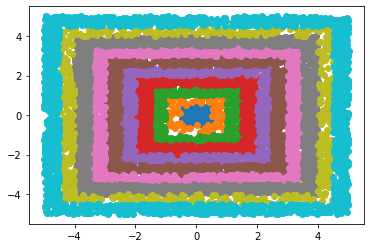

In [36]:
X, y = included_set(depth=10)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

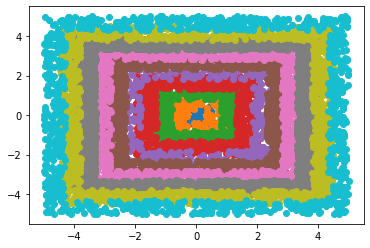

In [37]:
X, y = included_set(depth=10, offset=0.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

$\textbf{Подбор оптимальных параметров KNN}$

Рассмотрим KNN при различном количестве соседей и найдём оптимальное значение параметра для каждого из видов данных.

Для непересикающихся:

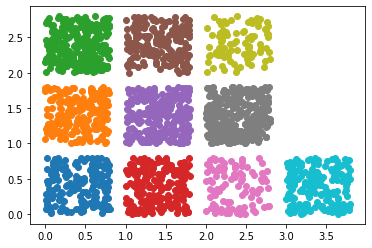

In [38]:
X, y = nearby_set(depth=10, factor = 0.8)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=1)
t_start = time()
knn.fit(X_train, y_train)
print("Time:%s" % (time()-t_start))
print_metrics(knn.predict(X_test), y_test)

Time:0.0017354488372802734
R^2: 1.0
MSE: 0.0


Перебрав количество возможных соседей в переделах от 1 до 10 получаем, что при столь хорошо кластерированных данных нам достаточно всего одного соседа, и на против, увеличение количества соседей уменьшает качество результатов.

Для пересикающихся

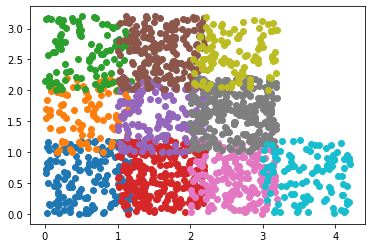

In [40]:
X, y = nearby_set(depth=10, factor = 1.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=10)
t_start = time()
knn.fit(X_train, y_train)
print("Time:%s" % (time()-t_start))
print_metrics(knn.predict(X_test), y_test)

Time:0.0013117790222167969
R^2: 0.8729194743672403
MSE: 0.7833841463414634


Перебрав количество возможных соседей в переделах от 1 до 15 получаем, что при наличии пересечений данных увеличение количества соседей даёт положительный эффект. В качестве оптимального подобрали значение 10. При дальнейшем увеличении либо не происходит видимых улучшений.

Для вложенных непересикающихся

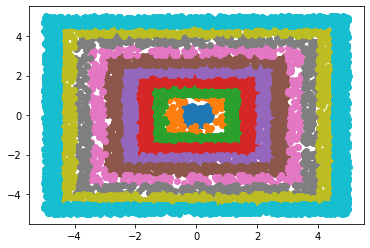

In [42]:
X, y = included_set(depth=10)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=3)
t_start=time()
knn.fit(X_train, y_train)
print("Time:%s" % (time()-t_start))
print_metrics(knn.predict(X_test), y_test)

Time:0.0031948089599609375
R^2: 0.9918716564998912
MSE: 0.054366078925272884


Перебрав количество возможных соседей в переделах от 1 до 10 получаем, что оптимальным количеством соседей является 3. Из-за особенностей устройтсва данных меньшее  количество показывает себя чуть менее эффективно, а из-за хорошей кластеризации увеличение количества соседей не приводит к положительному результату.

Для вложенных пересикающихся

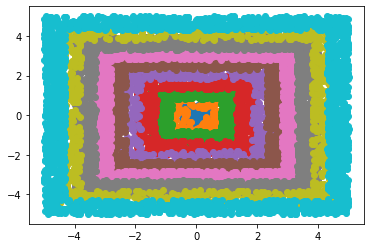

In [44]:
X, y = included_set(depth=10, offset=0.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=20)
t_start = time()
knn.fit(X_train, y_train)
print("Time:%s" % (time()-t_start))
print_metrics(knn.predict(X_test), y_test)

Time:0.005147695541381836
R^2: 0.9699396146307363
MSE: 0.1522250589159466


Перебрав количество возможных соседей в переделах от 1 до 30 получаем, что 20 это оптимальное количество соседей. Малое количество покаывает себя хуже из-за наличия пересечений, а большее количетсво не даёт видимого улучшения.

Также в процессе перебора параметров эксперемментальным путём выяснено, что для рассматривааемых данных, если количество соседей и влияет на скорость исполнения, то крайне незначительно. И при 1 и при 1000 соседей наблюдается аналогичное время подбора рабочих парамметров метода.

$\textbf{Теперь сравним методы на одних и тех же наборах данных с подобранными параметрами}$

In [46]:
def compare(X, y, n_neighbors=5, test_size=0.2, svm_kernel="linear"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    svm = SVC(kernel=svm_kernel)
    k_time = time()
    knn.fit(X_train, y_train)
    k_time = time() - k_time
    s_time = time()
    svm.fit(X_train, y_train)
    s_time = time() - s_time
    print("KNN:")
    print("Time:%s" % k_time)
    print_metrics(knn.predict(X_test), y_test)
    print("SVM:")
    print("Time:%s" % s_time)
    print_metrics(svm.predict(X_test), y_test)

На непересикающихся

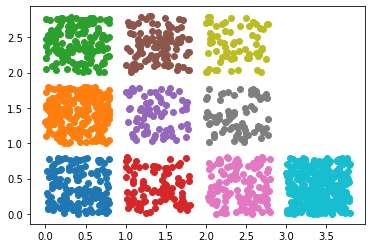

In [47]:
X, y = nearby_set(depth=10, factor = 0.8)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [48]:
compare(X, y, n_neighbors=1)

KNN:
Time:0.0020668506622314453
R^2: 1.0
MSE: 0.0
SVM:
Time:0.0077817440032958984
R^2: 1.0
MSE: 0.0


В данном случае методы справились одинаково хорошо из-за строгой кластеризации данных на плоскости. Время исполнения примерно аналогичное.

На пересикающихся данных

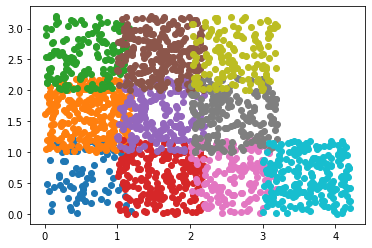

In [49]:
X, y = nearby_set(depth=10, factor = 1.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [50]:
compare(X, y, n_neighbors=10)

KNN:
Time:0.0024857521057128906
R^2: 0.9086326744756502
MSE: 0.6780952380952382
SVM:
Time:0.019747018814086914
R^2: 0.8832204122304805
MSE: 0.9153439153439153


В случае хорошо кластеризиванных но пересикабщихся данных KNN оказывается немного эффективнее и немного быстрее. 

На вложенных непересикающихся данных

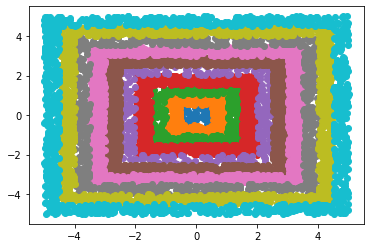

In [51]:
X, y = included_set(depth=10)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [52]:
compare(X, y, n_neighbors=3)

KNN:
Time:0.00455164909362793
R^2: 0.9897126965190014
MSE: 0.0552041403105233
SVM:
Time:3.414973735809326
R^2: 0.0
MSE: 6.162162162162162


В данном случае SVM с линейными разделителями оказывается абсолютно неэффективным, т.к. такие разделители не позволяют построить границу между вложенными областями данных. Также сокрость работы SVM, в отличии от KNN, крайне низка.

На вложенных пересикающихся данных

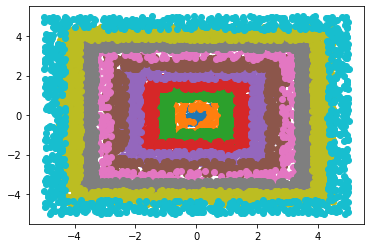

In [53]:
X, y = included_set(depth=10, offset=0.2)
for i in range (0, 10):
    pyplot.scatter(X[y == i].T[0], X[y == i].T[1])
pyplot.show()

In [54]:
compare(X, y, n_neighbors=20)

KNN:
Time:0.004538536071777344
R^2: 0.9656061461074409
MSE: 0.15885054844606947
SVM:
Time:4.651087284088135
R^2: -25.21798198076142
MSE: 6.467550274223035


Данный случай оказывается полностью аналогичен предыдущему. Эффективность KNN несколько снизилась, но метод всё ещё можно успешно применять. А SVM пересечение данных помочь никак не могло. Время работы аналогичо SVM крайне долгое.

$\textbf{Вывод:}$ на рассмотернных данных метод SVM c инейным разделителем оказался крайне неэффективным. Не в одном из тестов не было достингнуто ни преимущетсва в скорости работы, ни преимущетсва в точности классификации, а в случает вложенных данных классификация с хоть сколько-либо приемлемой точностью оказывается невозможна. Вероятно метод SVM может быть вполне применим и для таких случаев. Среди возможных путей решения можно рассмотреть полярные координаты и нелинейные раздели